In [2]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
with open('./cache/memo_apr10_zipf_num_heads_8_num_layers_12_resample/memo_apr10_zipf_num_heads_8_num_layers_12_resample_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1744325270.2539148.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()



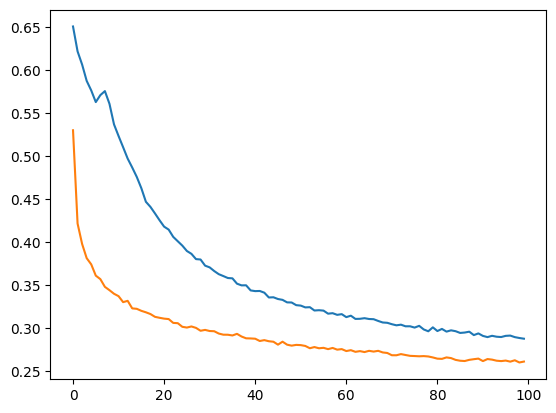

In [7]:
plt.plot([i['train_loss'] for i in data['logs']][:100])
plt.plot([i['train_loss'] for i in data['logs']][100:])

In [12]:
for i in data['logs']:
    if i['test_metrics'] != {}:
        print(i['test_metrics']["logsoftmaxloss"])

[0.704703   0.705358   0.6961175  ... 0.70271826 0.6755311  0.6947968 ]
[0.01922165 0.02998401 0.0351613  ... 0.72145617 0.6922515  0.6889554 ]
[0.01697559 0.02643468 0.03097936 ... 0.70252544 0.69843364 0.7015502 ]
[0.01876495 0.02598095 0.03155959 ... 0.70919824 0.70856947 0.70262015]
[0.01928352 0.02581241 0.0302145  ... 0.71166    0.7336796  0.70802146]
[0.01753782 0.02423261 0.03016908 ... 0.7052168  0.7199518  0.7193937 ]
[0.01908657 0.02815383 0.03203946 ... 0.70344967 0.69874865 0.7068321 ]
[0.02038569 0.02602026 0.03107003 ... 0.7021714  0.6844262  0.7077206 ]
[0.01952573 0.0261908  0.02914425 ... 0.70120484 0.68588305 0.7104715 ]
[0.01906122 0.02665003 0.02977492 ... 0.6960465  0.6906778  0.70078933]
[0.01905362 0.02710561 0.03132387 ... 0.69341874 0.68847454 0.705019  ]
[0.69972354 0.74947983 0.6956132  ... 0.6989336  0.69570905 0.737934  ]
[0.7225565 0.7171893 0.6975253 ... 0.7041421 0.68733   0.7378873]
[0.6678067  0.716615   0.69540745 ... 0.69620246 0.68768305 0.7116078 

# Apr 18

In [106]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
with open('./cache/memo_apr10_zipf_num_heads_24_num_layers_36_resample_lr_1e-4/memo_apr10_zipf_num_heads_24_num_layers_36_resample_lr_1e-4_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1744954785.908804.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()

In [107]:
loss_per_appearance = [i["loss_per_appearance"] for i in data["logs"]] # list of list of arrays
appearances = [i["appearances"] for i in data["logs"]] # list of list of arrays
time_per_batch = []
for epoch, batch in enumerate(data["logs"]):
    time_per_batch.append([])
    num_batches = len(batch["appearances"])
    for i, batch_id in enumerate(batch["appearances"]):
        time_per_batch[epoch].append(epoch * num_batches + (i) )
        

In [108]:
print("time, appearance, loss", len(time_per_batch[0]), len(appearances[0]), len(loss_per_appearance[0]))
ranks_to_plot = [0, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
rank_times = defaultdict(list)
rank_losses = defaultdict(list)
num_appearances = defaultdict(float)
rank_appearances = defaultdict(list)
# loop through each epoch
for t, a, l in zip(time_per_batch, appearances, loss_per_appearance):
    # loop through each batch
    for i in range(len(t)):
        # loop through each rank
        for rank in range(len(ranks_to_plot)):
            # print("rank", ranks_to_plot[rank], "time", t[i], "loss", l[i][np.where(a[i] == ranks_to_plot[rank])].mean())
            rank_times[ranks_to_plot[rank]].append(t[i])
            rank_losses[ranks_to_plot[rank]].append(l[i][np.where(a[i] == ranks_to_plot[rank])].mean())
            n = np.sum(a[i] == ranks_to_plot[rank])
            if n > 0:
                num_appearances[ranks_to_plot[rank]] += n
            rank_appearances[ranks_to_plot[rank]].append(num_appearances[ranks_to_plot[rank]])
    
    


time, appearance, loss 391 391 391


/tmp/ipykernel_32280/387772012.py:15: RuntimeWarning: Mean of empty slice.
  rank_losses[ranks_to_plot[rank]].append(l[i][np.where(a[i] == ranks_to_plot[rank])].mean())
/mnt/cup/labs/norman/qanguyen/patdiff_seq/fmri/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


colormin 0.0 colormax 6.317326915880377


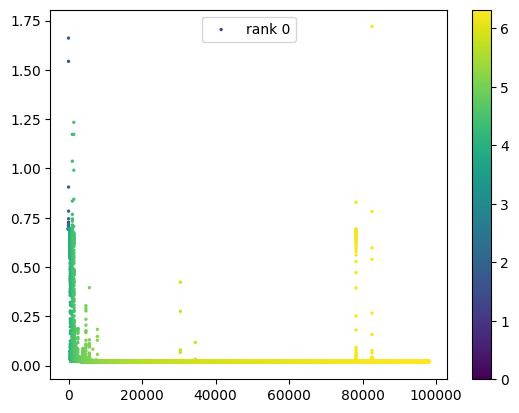

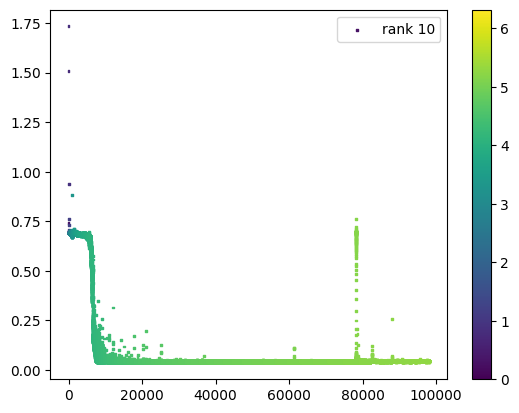

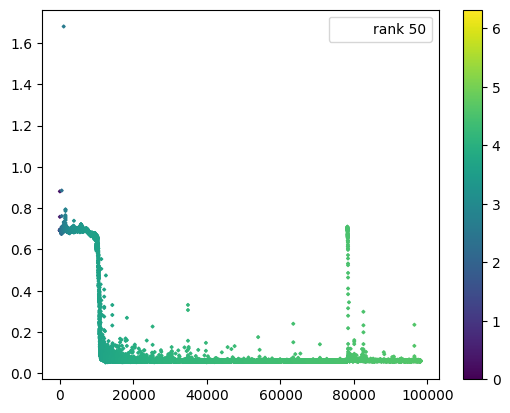

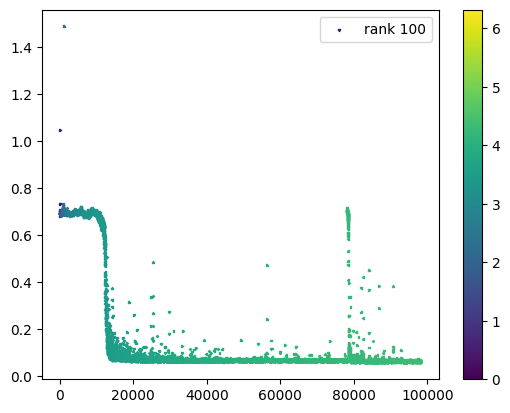

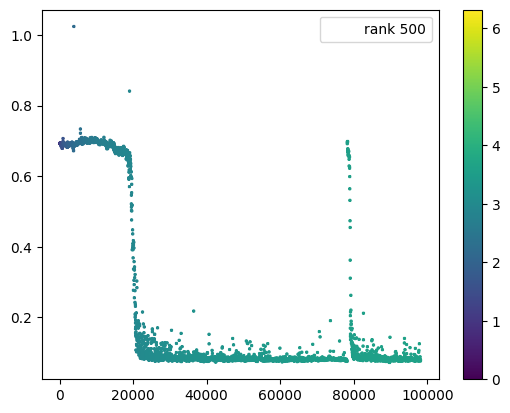

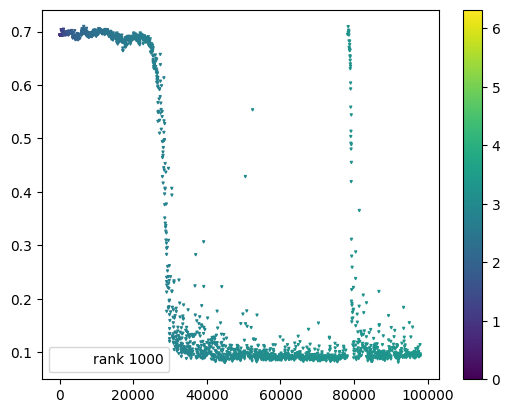

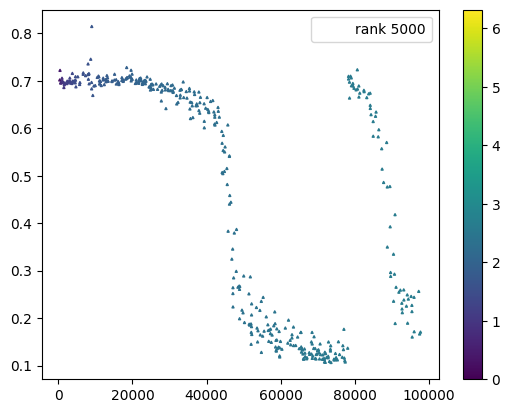

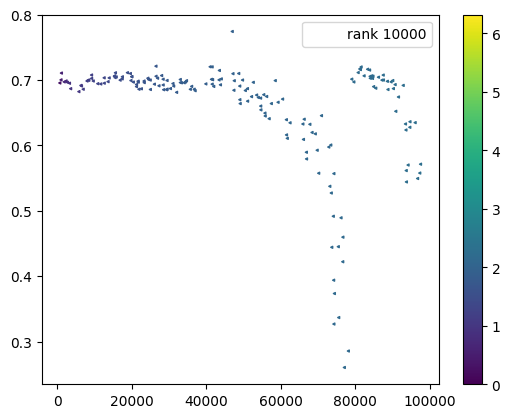

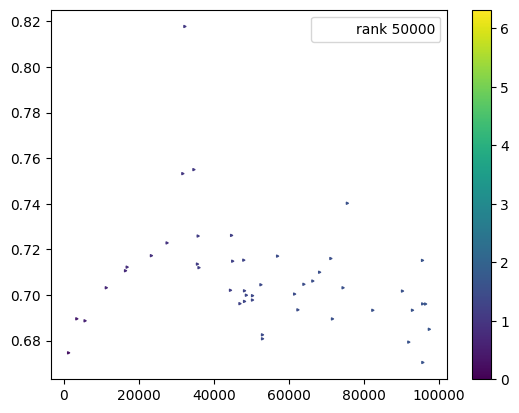

In [109]:
import matplotlib.colors as mcolors
markers = ["o", "s", "D", "P", "X", "v", "^", "<", ">"]
from matplotlib.colors import Normalize

def numbers_to_viridis_colors(numbers, vmin, vmax):
    """
    Convert a list of real numbers to colors using the viridis colormap.
    
    Args:
        numbers (list or numpy.ndarray): List of real numbers to convert to colors
        
    Returns:
        list: List of RGB colors in the format (r, g, b) where each component is between 0 and 1
    """
    # Convert input to numpy array if it's not already
    numbers = np.array(numbers)
    
    # Create a normalizer to map the numbers to [0, 1] range
    norm = Normalize(vmin=vmin, vmax=vmax)
    
    # Get the viridis colormap
    cmap = plt.cm.viridis
    
    # Convert numbers to colors
    colors = cmap(norm(numbers))
    
    # Return list of RGB colors (excluding alpha channel)
    return colors[:, :3].tolist()
colormin = np.log10(min(np.concatenate(list(rank_appearances.values())))+1)
colormax = np.log10(max(np.concatenate(list(rank_appearances.values())))+1)
print("colormin", colormin, "colormax", colormax)
for i, rank in enumerate(ranks_to_plot):
    # print("rank_appearances",  numbers_to_viridis_colors(np.log(np.array(rank_appearances[rank])+1), colormin, colormax))
    scatter = plt.scatter(rank_times[rank], rank_losses[rank], 
                        #   c=numbers_to_viridis_colors(np.log(np.array(rank_appearances[rank])+1), colormin, colormax),
                        c = np.log10(np.array(rank_appearances[rank])+1),
                          norm = mcolors.Normalize(vmin=colormin, vmax=colormax),
                label=f"rank {rank}", s=2, marker=markers[i])
    
    cb = plt.colorbar()
    plt.legend()
    plt.show()

## Forgetting

In [111]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
with open('./cache/memo_apr6_zipf_num_heads_24_num_layers_36_lr_1e-4_forget/memo_apr6_zipf_num_heads_24_num_layers_36_lr_1e-4_forget_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1744963472.1043994.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()

(241, 100000)


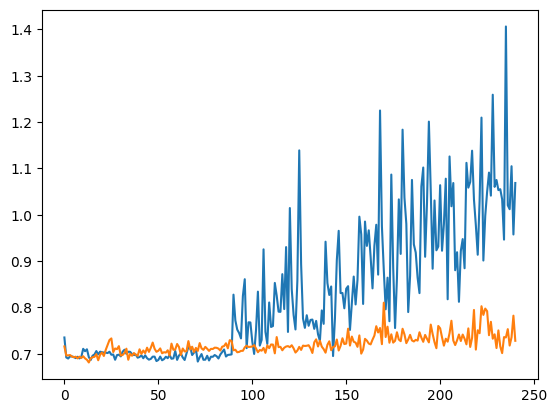

In [136]:
test_epoch = np.stack([i["test_metrics"]["logsoftmaxloss"] for i in data["logs"]]) # list of list of arrays
print(test_epoch.shape)
plt.plot(test_epoch[:,0])
plt.plot(test_epoch[:,100])
plt.show()